# エクセルファイルを読み込んでプロットをし、gifを作成

In [1]:
import numpy as np
from PIL import Image
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm , trange
%matplotlib inline
import math
from qiskit import QuantumCircuit, execute,Aer,IBMQ,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram
from openpyxl import Workbook
from glob import glob
import japanize_matplotlib
from openpyxl import load_workbook
from openpyxl.chart import BarChart,Reference

#### 使うファイルによって、usecolsとinsert_letterを変更する必要がある。

In [2]:
df = pd.read_excel('./量子アルゴリ計算/量子移流拡散計算/result_まとめ/12-21/ad_diff_out.xlsx',sheet_name='量子',usecols='A:AO' ,header=None)
df = pd.DataFrame(df)
insert_letter = 'C = 0.125, D = 0.25'
df

/var/folders/x1/4qqlz0094x78482c0fhvh6gh0000gn/T/ipykernel_30566/1770558174.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  df = pd.read_excel('./量子アルゴリ計算/量子移流拡散計算/result_まとめ/12-21/ad_diff_out.xlsx',sheet_name='量子',usecols='A:AO' ,header=None)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.250000,4.375000,9.375000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0,0.000000,0.000000,0.000000,0.000000,0.312500,1.562500,4.453125,8.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0,0.000000,0.000000,0.000000,0.078125,0.507812,1.812500,4.437500,8.351562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0,0.000000,0.000000,0.015625,0.148438,0.664062,1.976562,4.437500,8.039062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0,0,0.015625,0.085938,0.226562,0.414062,0.601562,0.773438,0.968750,1.210938,...,5.335938,4.648438,3.976562,3.328125,2.718750,2.148438,1.656250,1.234375,0.859375,0.468750
87,0,0,0.015625,0.085938,0.226562,0.414062,0.585938,0.750000,0.929688,1.187500,...,5.398438,4.710938,4.039062,3.390625,2.781250,2.210938,1.718750,1.296875,0.906250,0.492188
88,0,0,0.015625,0.085938,0.226562,0.398438,0.562500,0.726562,0.929688,1.171875,...,5.460938,4.789062,4.125000,3.476562,2.843750,2.273438,1.781250,1.343750,0.945312,0.515625
89,0,0,0.015625,0.085938,0.210938,0.375000,0.539062,0.726562,0.929688,1.171875,...,5.539062,4.875000,4.226562,3.562500,2.929688,2.335938,1.828125,1.382812,0.968750,0.539062


In [3]:
t = len(df)
x = len(df.columns)

In [4]:
q = df.values

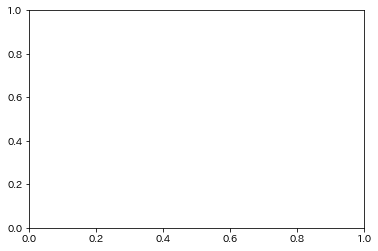

In [5]:
# 可視化
# x軸準備
x_axis = []
for i in range(x):
    x_axis.append(i)
    
    
# 新規フォルダ作成
dt_now = datetime.datetime.now()
month = dt_now.month
day = dt_now.day
hour = dt_now.hour
minute = dt_now.minute
now = str(month) + '-' + str(day) + '-' + str(hour) + '-' + str(minute)
path = './result/diff' + now
os.mkdir(path)

# プロットと画像保存
x_limit = x
y_limit = max(q[0]) + 1

for i in range(t):
    text = 't = ' + str(i)
    x_cor = x * 0.7
    y_cor = max(q[0]) * 0.8
    plt.text(x_cor,y_cor,text)
    plt.text(x_cor,y_cor*0.9,insert_letter)
    plt.title('1dimension _advection-diffusion simulation')
    plt.xlabel('位置(x)', fontsize=14)
    plt.ylabel('濃度(q)', fontsize=14)
    plt.xlim([0,x_limit])
    plt.ylim([0,y_limit])
    plt.plot(x_axis,q[i])
    file_name = path + '/diff_{0}.png'.format(i)
    plt.savefig(file_name)
    plt.gca().clear()
    
    
# gif画像
pictures = []
for i in range(t):
    pic_pass = path + '/diff_' + str(i) + '.png'
    img = Image.open(pic_pass)
    pictures.append(img)
    
    
gif_save_path = path + 'diffusion.gif'

pictures[0].save(gif_save_path,save_all=True, append_images=pictures[1:],
optimize=False, duration=80, loop=0)